In [ ]:
!pip3 install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet') 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Tokenization

In [ ]:
from nltk import word_tokenize
text = "It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife."
words = word_tokenize(text)
print(words)

['It', 'is', 'a', 'truth', 'universally', 'acknowledged', ',', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', ',', 'must', 'be', 'in', 'want', 'of', 'a', 'wife', '.']


In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(words)
print(fdist)

<FreqDist with 20 samples and 26 outcomes>


In [ ]:
fdist.most_common(2)


[('a', 4), (',', 2)]

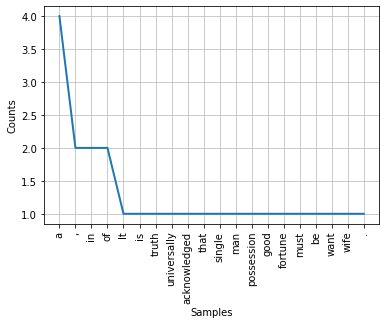

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# POS Tagging

In [ ]:
from nltk import pos_tag
pos = pos_tag(words)
print(pos)


[('It', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('truth', 'NN'), ('universally', 'RB'), ('acknowledged', 'VBD'), (',', ','), ('that', 'IN'), ('a', 'DT'), ('single', 'JJ'), ('man', 'NN'), ('in', 'IN'), ('possession', 'NN'), ('of', 'IN'), ('a', 'DT'), ('good', 'JJ'), ('fortune', 'NN'), (',', ','), ('must', 'MD'), ('be', 'VB'), ('in', 'IN'), ('want', 'NN'), ('of', 'IN'), ('a', 'DT'), ('wife', 'NN'), ('.', '.')]


# Stop Words Removal

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
filtered_words = [word for word in words if word not in stop_words]
print(filtered_words)

['It', 'truth', 'universally', 'acknowledged', ',', 'single', 'man', 'possession', 'good', 'fortune', ',', 'must', 'want', 'wife', '.']


# Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in filtered_words]
print(stemmed)


['It', 'truth', 'univers', 'acknowledg', ',', 'singl', 'man', 'possess', 'good', 'fortun', ',', 'must', 'want', 'wife', '.']


# Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()   
lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed] 
print("The lemmatized words: ", lemmatized_words) 
lemmatized_words_pos = [lemmatizer.lemmatize(word, pos = "v") for word in stemmed]
print("The lemmatized words using a POS tag: ", lemmatized_words_pos) 


The lemmatized words:  ['It', 'truth', 'univers', 'acknowledg', ',', 'singl', 'man', 'posse', 'good', 'fortun', ',', 'must', 'want', 'wife', '.']
The lemmatized words using a POS tag:  ['It', 'truth', 'univers', 'acknowledg', ',', 'singl', 'man', 'possess', 'good', 'fortun', ',', 'must', 'want', 'wife', '.']


# Performing Sentiment Analysis using Text Classification


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('train.tsv', sep='\t')

In [ ]:
data.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
data.Sentiment.value_counts()


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

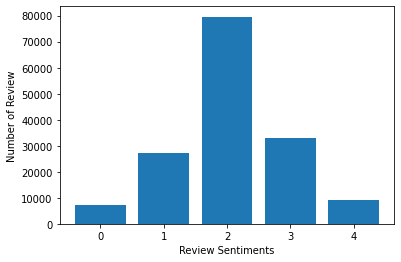

In [ ]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

# Feature Generation using Bag of Words


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

# Split train and test set


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

# Model Building and Evaluation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


# Feature Generation using TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

# Split train and test set (TF-IDF)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

# Model Building and Evaluation (TF-IDF)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684
